Кузьменков Никита Геннадьевич БПМ223

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

Загружаем датасет

In [ ]:
data = pd.read_csv('6 class csv.csv')
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000,7.250000,3.758333
std,9552.425037,179432.244940,517.155763,10.532512,1.711394,4.926659,2.090007
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,2.000000,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000,10.000000,5.000000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000,10.000000,5.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000,18.000000,6.000000


Убираем неинформативный столбец с номером

In [ ]:
df = data[['Temperature (K)',	'Luminosity(L/Lo)',	'Radius(R/Ro)',	'Absolute magnitude(Mv)',	'Star type',	'Star color',	'Spectral Class']].copy()

Смотрим количество пустых клеток

In [ ]:
df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

Пустых ячеек нет и значения во всех ячейках числовые, а значит дополнительно предобрабатывать датасет не надо

Смотрим распределение значений таргета

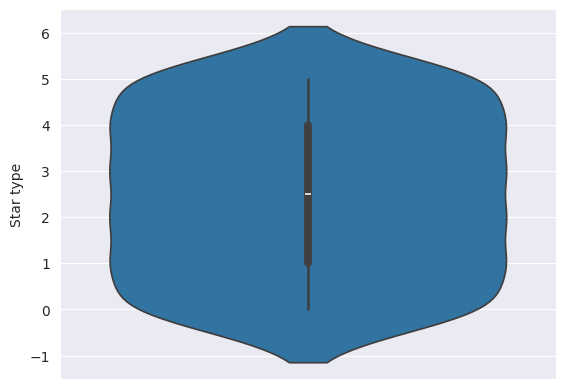

In [ ]:
sns.set_style('darkgrid')
sns.violinplot(y=df['Star type']);

Столбчатая диаграмма с распределением таргета

<ipython-input-13-06bbf62a24bd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Star type'])


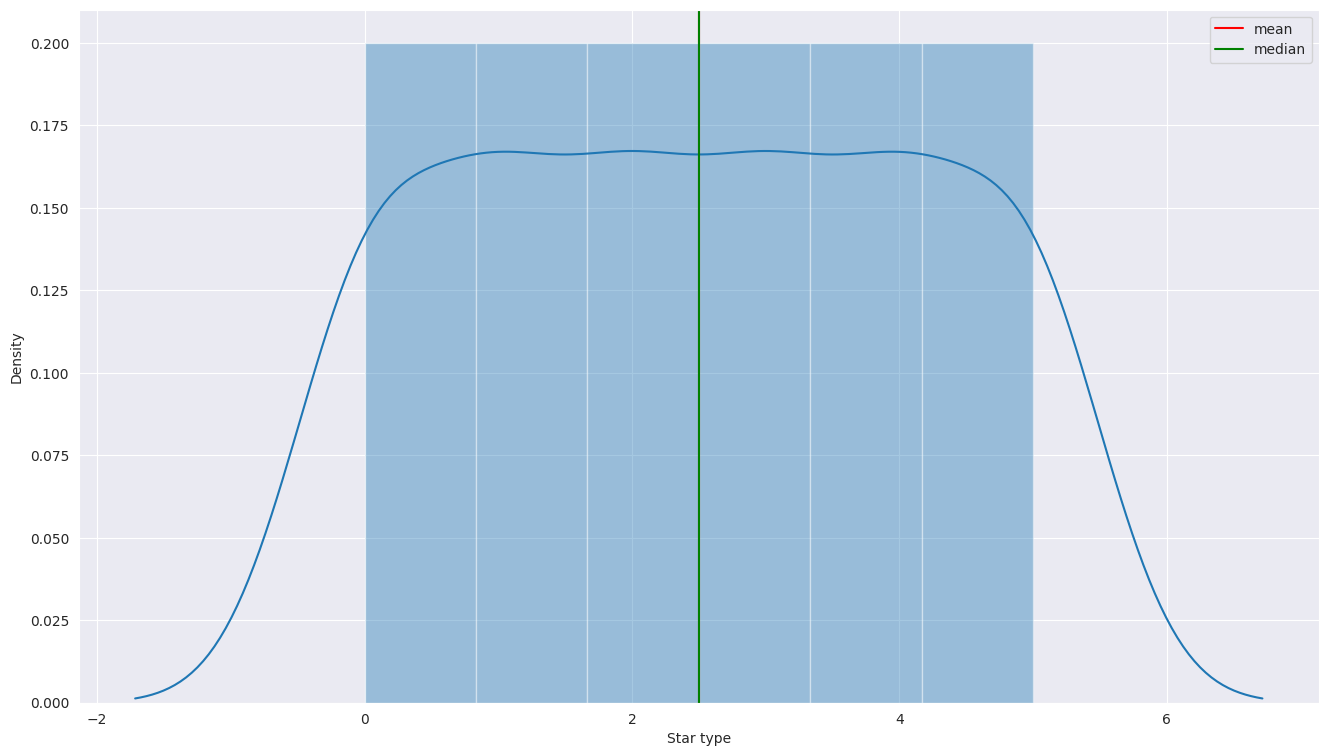

In [ ]:
plt.figure(figsize=(16,9))
sns.distplot(df['Star type'])
mean_v = df['Star type'].mean()
median_v = df['Star type'].median()
plt.axvline(mean_v, color = 'red', label='mean')
plt.axvline(median_v, color = 'green', label='median');
plt.legend()

Рассчитываем корреляцию таргета с остальными параметрами

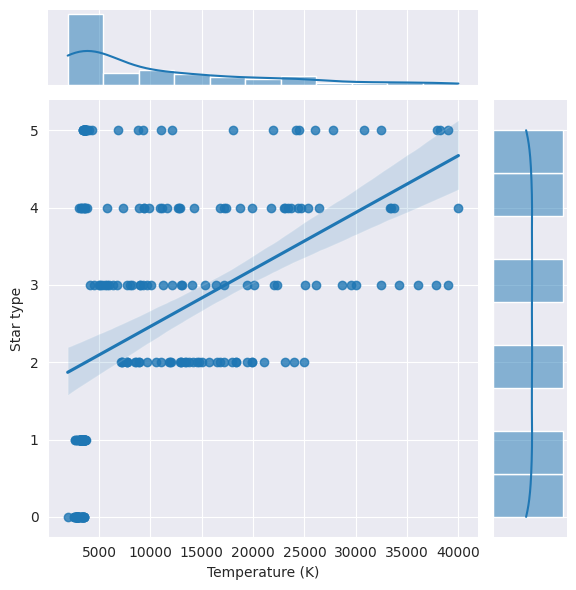

In [ ]:
sns.jointplot(data=df, x='Temperature (K)', y='Star type',kind='reg')

Положительная корреляция

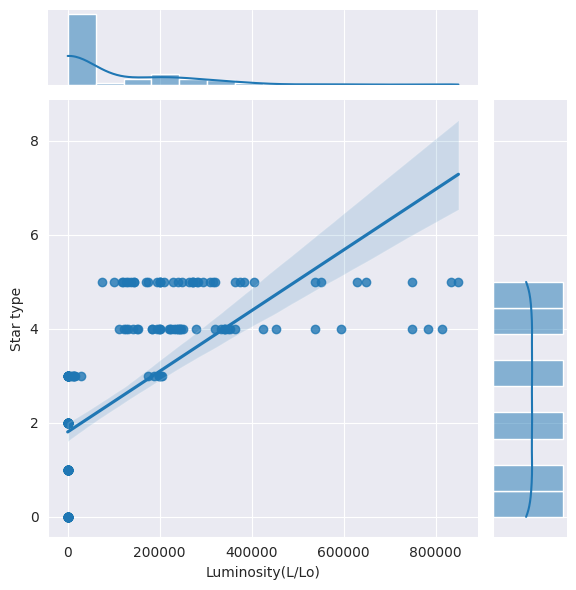

In [ ]:
sns.jointplot(data=df, x='Luminosity(L/Lo)', y='Star type',kind='reg')

Положительная корреляция

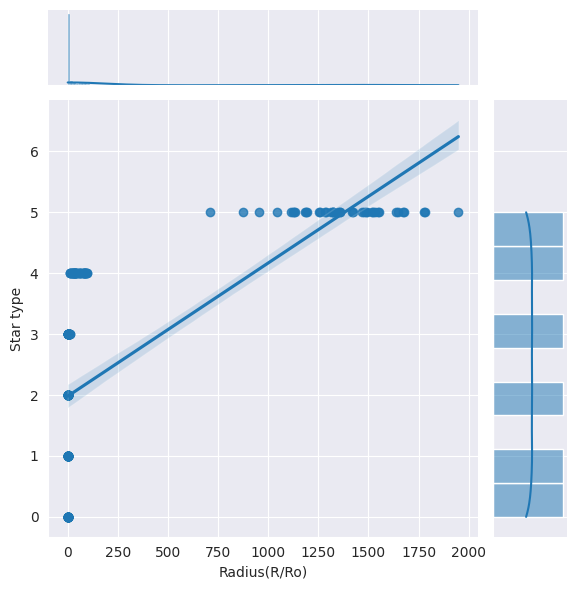

In [ ]:
sns.jointplot(data=df, x='Radius(R/Ro)', y='Star type',kind='reg')

Положительная корреляция

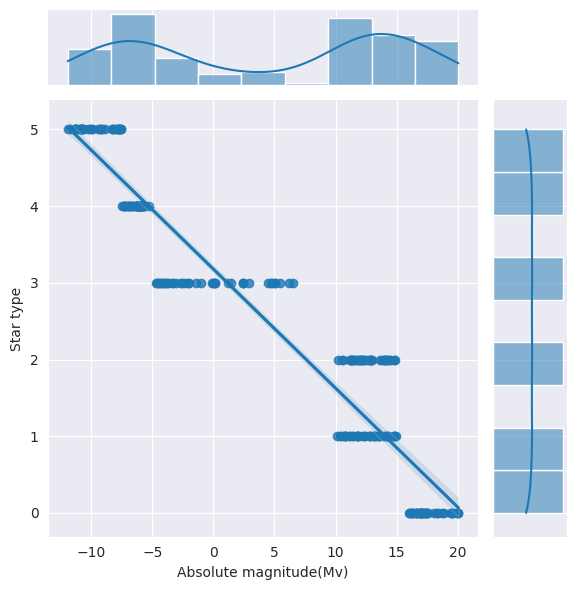

In [ ]:
sns.jointplot(data=df, x='Absolute magnitude(Mv)', y='Star type',kind='reg')

Отрицательная корреляция

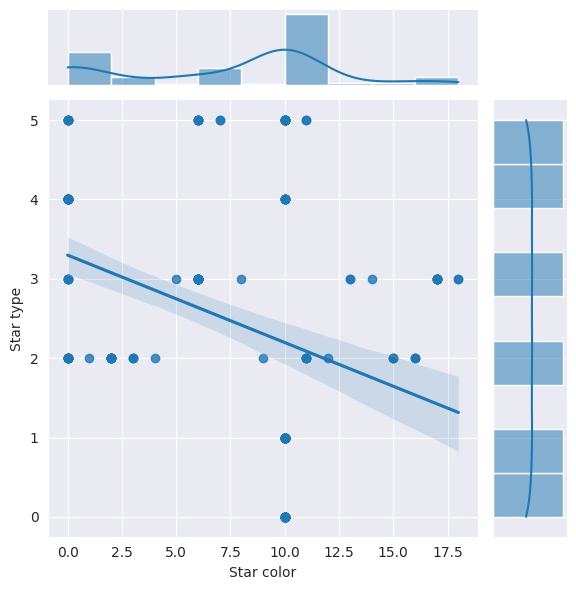

In [ ]:
sns.jointplot(data=df, x='Star color', y='Star type',kind='reg')

Небольшая отрицательная корреляция

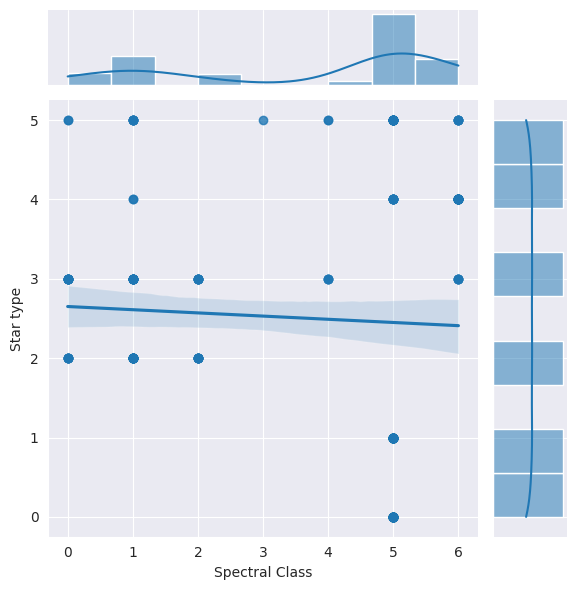

In [ ]:
sns.jointplot(data=df, x='Spectral Class', y='Star type',kind='reg')

Корреляция практически отсутствует

Выводим таблицу со значениями корреляции параметров из столбцов с параметрами с строк

<Axes: >

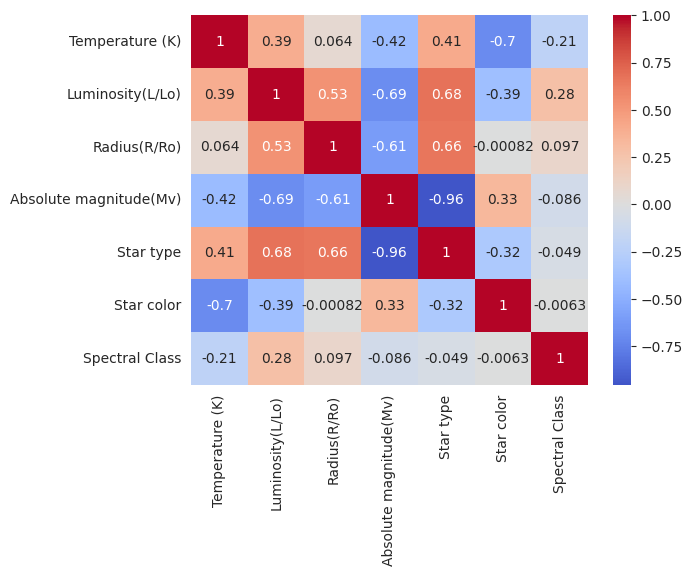

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True, center=0, cmap='coolwarm')

У таргета Star type очень большая отрицательная корреляция с фичtq Absolute magnitude. Также большая положительная корреляция с фичами Luminosity и Radius, средняя положительная с Temperature и отрицательная с Star color. С фичей Spectral Class корреляция практически отсутствует.

Модель

Разбиваем датасет на две части: фичи (X) и таргеты (y)

In [ ]:
X = df.drop(['Star type'], axis = 1)
y = df[['Star type']]

Выводим размеры получившихся двумерных массивов

In [ ]:
print('X ',X.shape,' Y ', y.shape)

X  (240, 6)  Y  (240, 1)


Разбиваем данные на обучающую и тренировачную части

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(180, 6)

Масштабирование данных


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Инициализация модели логистической регрессии

In [ ]:
model = LogisticRegression(max_iter=1000)

Кросс-валидация для оценки модели

In [ ]:
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f'Средняя точность на кросс-валидации: {cv_scores.mean()}')

Средняя точность на кросс-валидации: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Подбор гиперпараметров с помощью GridSearchCV

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga']
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'saga']})

Лучшие гиперпараметры

In [ ]:
print(f'Лучшие гиперпараметры: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

Лучшие гиперпараметры: {'C': 100, 'solver': 'lbfgs'}


Обучение модели с лучшими гиперпараметрами

In [ ]:
best_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=100, max_iter=1000)

Предсказания на тестовой выборке

In [ ]:
y_pred = best_model.predict(X_test_scaled)

Оценка модели

In [ ]:
print(f'Точность на тестовой выборке: {accuracy_score(y_test, y_pred)}')
print('Отчет по классификации:')
print(classification_report(y_test, y_pred))

Точность на тестовой выборке: 0.9833333333333333
Отчет по классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         9
           3       1.00      0.89      0.94         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        12

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

